<a href="https://colab.research.google.com/github/AniketC24/Datascience/blob/main/Case_Study_03_Loan_Approval_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Filterwarnings Library
import warnings
warnings.filterwarnings('ignore')

# Importing Logging
import logging
logging.basicConfig(level= logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s %(levelname)s %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [2]:
# Importing Data using pandas function
df = pd.read_csv('loan_data.csv')
# df = pd.read_csv('bank.csv',sep = ';')  and ','  in the seperated datast
# It will print 100 & shuffle data
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
23776,35,male,Associate,79021,16,MORTGAGE,25000,DEBTCONSOLIDATION,9.51,0.32,10,664,No,0
19452,27,male,High School,41293,4,MORTGAGE,8000,MEDICAL,11.01,0.19,10,556,Yes,0
40618,25,male,Associate,180720,2,MORTGAGE,25000,EDUCATION,10.46,0.14,3,570,Yes,0
32969,27,female,Associate,47379,5,RENT,5918,EDUCATION,9.21,0.12,4,614,Yes,0
29127,44,male,High School,703125,24,MORTGAGE,20000,MEDICAL,11.01,0.03,16,563,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37364,26,female,Bachelor,126951,0,MORTGAGE,5000,HOMEIMPROVEMENT,8.10,0.04,4,648,Yes,0
6595,24,male,Bachelor,61093,6,RENT,6000,MEDICAL,14.79,0.10,4,643,No,0
28326,31,female,Master,100794,6,MORTGAGE,7500,MEDICAL,11.01,0.07,10,557,Yes,0
6236,22,female,Bachelor,37144,0,RENT,6000,EDUCATION,14.27,0.16,3,663,No,1


In [3]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

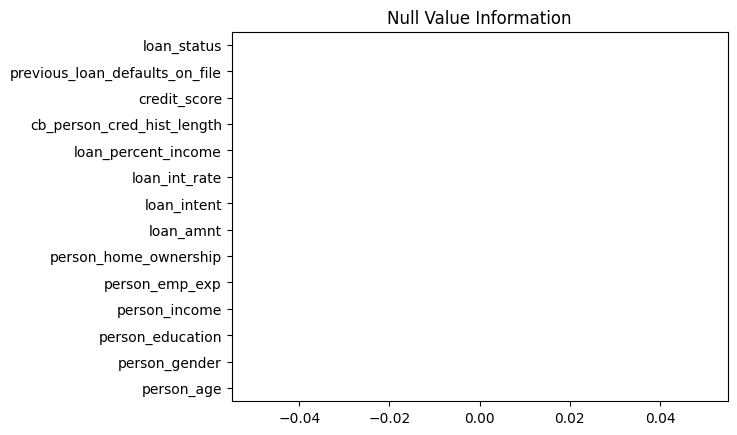

In [4]:
# Checking Null Value Present in Dataset
df.isnull().sum().plot(kind=  'barh')
plt.title('Null Value Information')
plt.show()

In [5]:
# Split the Dataset info Categorical and Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')


In [6]:
# Exploratory Data Analysis:
# 1. Univariate Analysis

'''
Step 1: Create a Blank List: stats[]
Step 2: Create Dictionary using OrderdDict
step 3: Append list with Dictionary
step 4: Convert stats[] i.e List into DataFrame

'''

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count':df[i].count(),
        'Min':df[i].min(),
        'Max':df[i].max(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Mode':df[i].mode()[0],
        'Standard Deviation':df[i].std(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report



,Feature,Count,Min,Max,Mean,Median,Mode,Standard Deviation,Q1,Q3,IQR,Skewness,Kurtosis
0,person_age,45000,20.00,144.00,27.764178,26.00,23.00,6.045108,24.00,30.00,6.00,2.548154,18.649449
1,person_income,45000,8000.00,7200766.00,80319.053222,67048.00,8000.00,80422.498632,47204.00,95789.25,48585.25,34.137583,2398.684769
2,person_emp_exp,45000,0.00,125.00,5.410333,4.00,0.00,6.063532,1.00,8.00,7.00,2.594917,19.168324
3,loan_amnt,45000,500.00,35000.00,9583.157556,8000.00,10000.00,6314.886691,5000.00,12237.25,7237.25,1.179731,1.351215
4,loan_int_rate,45000,5.42,20.00,11.006606,11.01,11.01,2.978808,8.59,12.99,4.40,0.213784,-0.420335
5,loan_percent_income,45000,0.00,0.66,0.139725,0.12,0.08,0.087212,0.07,0.19,0.12,1.034512,1.082416
6,cb_person_cred_hist_length,45000,2.00,30.00,5.867489,4.00,4.00,3.879702,3.00,8.00,5.00,1.631720,3.725945
7,credit_score,45000,390.00,850.00,632.608756,640.00,658.00,50.435865,601.00,670.00,69.00,-0.610261,0.203022
8,loan_status,45000,0.00,1.00,0.222222,0.00,0.00,0.415744,0.00,0.00,0.00,1.336351,-0.214176


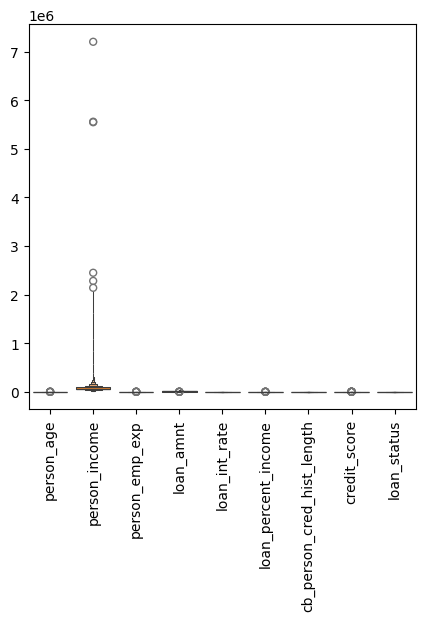

In [7]:
plt.figure(figsize = (5,5))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

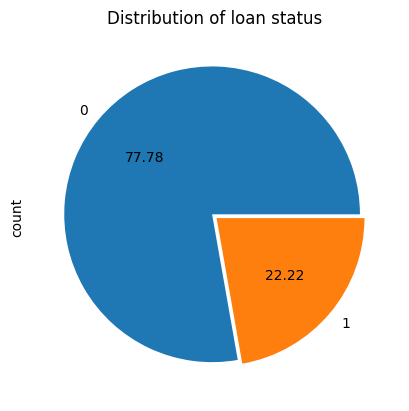

In [8]:
# Distribution of loan status
'''
Data Insights:
1. 77.78 % People Not approved their loan status from bank.
2. 22.22 % People approved their loan status from bank.
'''

df['loan_status'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.02,0.02])
plt.title('Distribution of loan status')
plt.show()

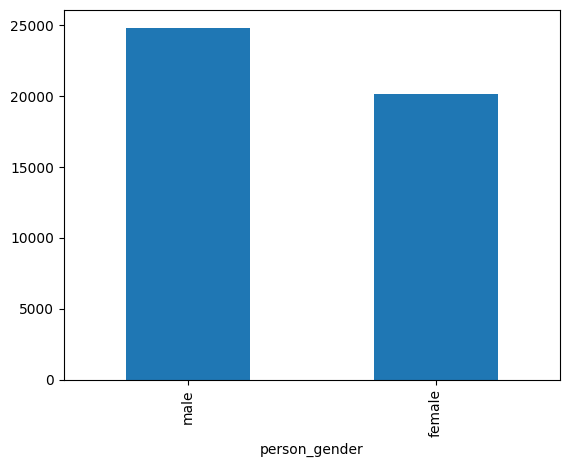

In [9]:
# Gender Distribution
df['person_gender'].value_counts().plot(kind = 'bar')
plt.show()

In [10]:
# Loan status based on gender
# Loan is approved and gender must be Male
loan_status_approved_male = df[(df['loan_status'] == 1) & (df['person_gender'] == 'male')]
loan_status_approved_male

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
12,23,male,Bachelor,114860,3,RENT,35000,VENTURE,7.90,0.30,2,573,No,1
13,26,male,Master,130713,0,RENT,35000,EDUCATION,18.39,0.27,4,708,No,1
18,23,male,Bachelor,136628,0,RENT,35000,DEBTCONSOLIDATION,18.25,0.26,4,709,No,1
24,22,male,Bachelor,97420,1,RENT,33950,PERSONAL,14.54,0.35,4,691,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,24,male,High School,37786,0,MORTGAGE,13500,EDUCATION,13.43,0.36,4,612,No,1
44995,27,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3,645,No,1
44997,33,male,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6,604,No,1


In [11]:
# Loan status based on gender
# Loan is approved and gender must be Female
loan_status_approved_female = df[(df['loan_status'] == 1) & (df['person_gender'] == 'female')]
loan_status_approved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
5,21,female,High School,12951,0,OWN,2500,VENTURE,7.14,0.19,2,532,No,1
6,26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,3,701,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,28,female,Associate,49170,4,RENT,10401,HOMEIMPROVEMENT,11.97,0.21,6,677,No,1
44992,23,female,Bachelor,40925,0,RENT,9000,PERSONAL,11.01,0.22,4,487,No,1
44993,27,female,High School,35512,4,RENT,5000,PERSONAL,15.83,0.14,5,505,No,1
44994,24,female,Associate,31924,2,RENT,12229,MEDICAL,10.70,0.38,4,678,No,1


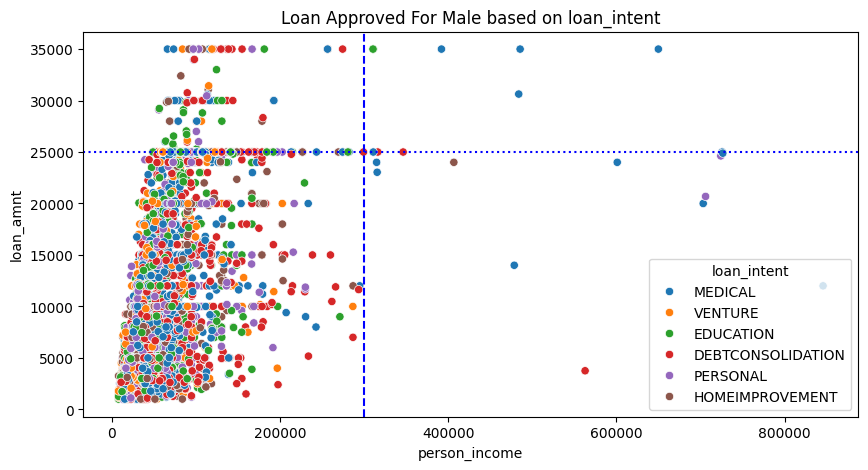

In [24]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],y = loan_status_approved_male['loan_amnt'],hue = loan_status_approved_male['loan_intent'])
plt.title('Loan Approved For Male based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

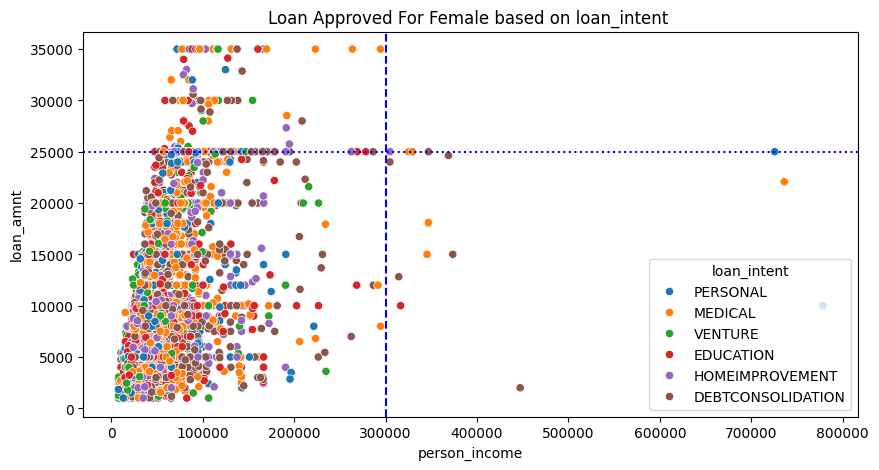

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_female['person_income'],y = loan_status_approved_female['loan_amnt'],hue = loan_status_approved_female['loan_intent'])
plt.title('Loan Approved For Female based on loan_intent ')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

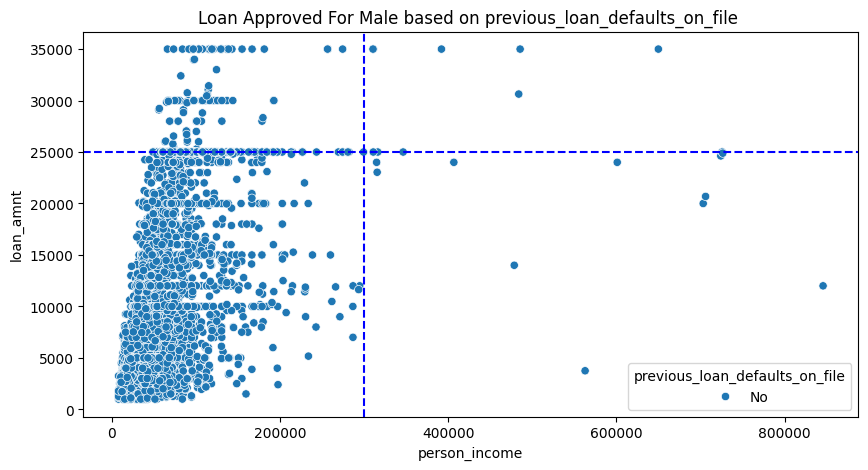

In [26]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'], y = loan_status_approved_male['loan_amnt'],hue =loan_status_approved_male['previous_loan_defaults_on_file'])
plt.title('Loan Approved For Male based on previous_loan_defaults_on_file ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

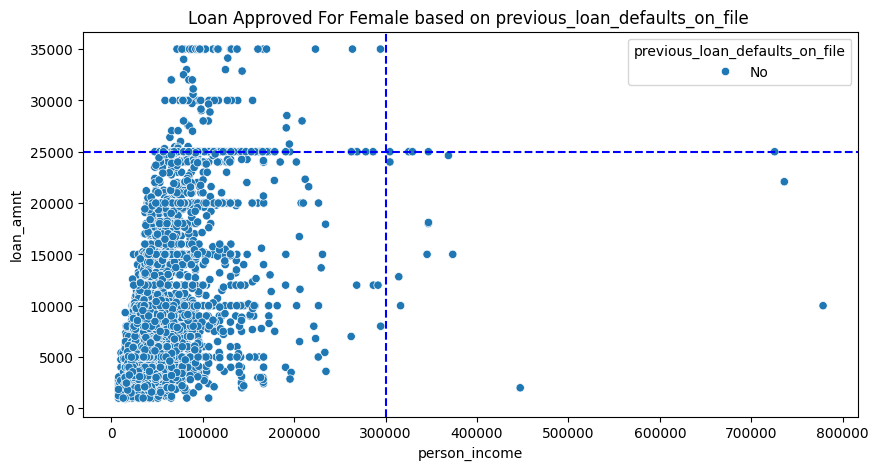

In [27]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_female['person_income'], y = loan_status_approved_female['loan_amnt'],hue =loan_status_approved_female['previous_loan_defaults_on_file'])
plt.title('Loan Approved For Female based on previous_loan_defaults_on_file ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()


In [28]:
loan_status_notapproved_male=df[(df['loan_status'] == 0) & (df['person_gender'] == 'male')]
loan_status_notapproved_male

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
16,23,male,Bachelor,144943,0,RENT,35000,EDUCATION,7.90,0.24,4,663,No,0
20,25,male,Bachelor,195718,0,RENT,35000,VENTURE,7.49,0.18,4,684,Yes,0
21,25,male,High School,165792,4,RENT,34800,PERSONAL,16.77,0.21,2,662,No,0
27,23,male,High School,14293,0,OWN,1400,PERSONAL,9.32,0.10,3,607,No,0
31,25,male,Bachelor,144855,1,RENT,32000,VENTURE,6.62,0.22,2,586,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42098,26,male,Associate,85414,2,RENT,12000,EDUCATION,6.72,0.14,4,509,Yes,0
42099,25,male,Bachelor,165605,0,MORTGAGE,9989,VENTURE,5.92,0.06,4,648,No,0
42100,27,male,Associate,96196,1,MORTGAGE,8000,MEDICAL,6.38,0.08,8,593,Yes,0
42103,36,male,Bachelor,60006,15,OWN,2755,MEDICAL,8.92,0.05,9,609,Yes,0


In [29]:
loan_status_notapproved_female=df[(df['loan_status'] == 0) & (df['person_gender'] == 'female')]
loan_status_notapproved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
14,23,female,Associate,138998,0,RENT,35000,EDUCATION,7.90,0.25,4,583,No,0
15,23,female,Master,600891,5,MORTGAGE,30000,DEBTCONSOLIDATION,10.65,0.05,3,670,Yes,0
23,24,female,Bachelor,13866,0,OWN,1500,PERSONAL,7.29,0.11,3,600,Yes,0
33,25,female,High School,368115,3,RENT,24250,DEBTCONSOLIDATION,13.85,0.07,3,567,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,27,female,High School,107051,2,MORTGAGE,24000,MEDICAL,11.21,0.22,5,611,Yes,0
42102,28,female,Associate,36900,6,RENT,2000,VENTURE,5.77,0.05,6,526,Yes,0
42104,25,female,Bachelor,64146,2,MORTGAGE,7200,VENTURE,10.28,0.11,3,625,Yes,0
42106,28,female,High School,110291,7,RENT,13453,VENTURE,13.29,0.12,6,631,Yes,0


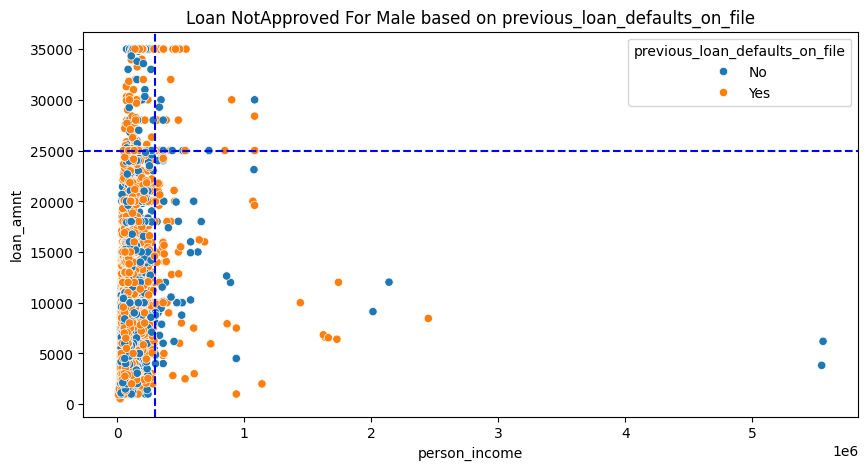

In [30]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'], y = loan_status_notapproved_male['loan_amnt'],hue =loan_status_notapproved_male['previous_loan_defaults_on_file'])
plt.title('Loan NotApproved For Male based on previous_loan_defaults_on_file')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()


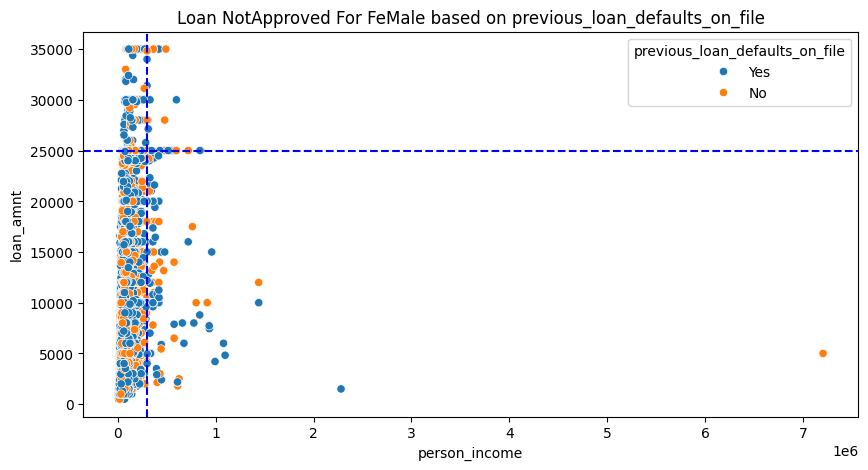

In [31]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_female['person_income'], y = loan_status_notapproved_female['loan_amnt'],hue =loan_status_notapproved_female['previous_loan_defaults_on_file'])
plt.title('Loan NotApproved For FeMale based on previous_loan_defaults_on_file')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

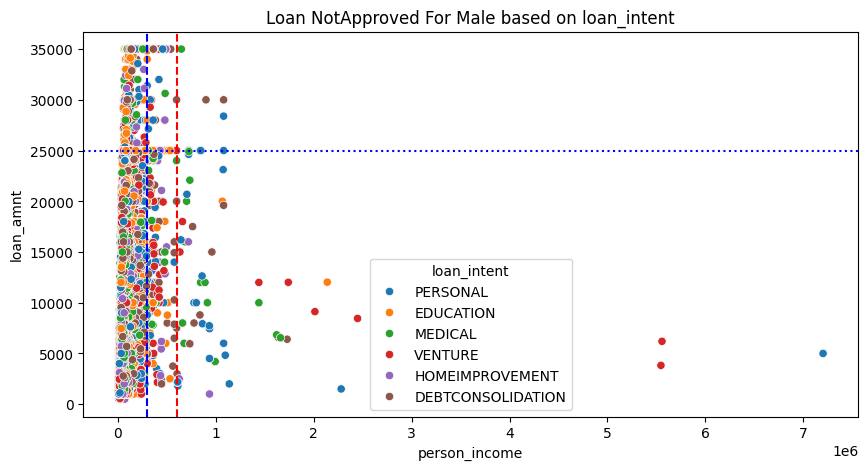

In [32]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = df['person_income'],y = df['loan_amnt'],hue = df['loan_intent'])
plt.title('Loan NotApproved For Male based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.axvline(600000,linestyle = '--',c = 'red')
plt.show()

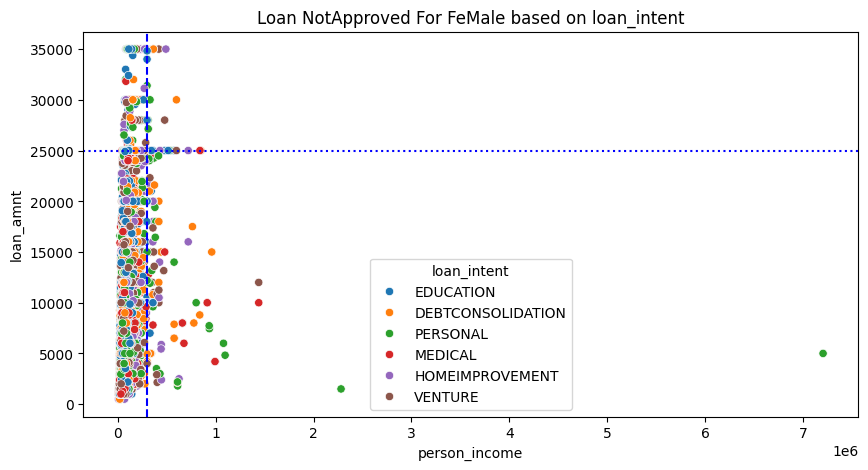

In [34]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_female['person_income'],y = loan_status_notapproved_female['loan_amnt'],hue = loan_status_notapproved_female['loan_intent'])
plt.title('Loan NotApproved For FeMale based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

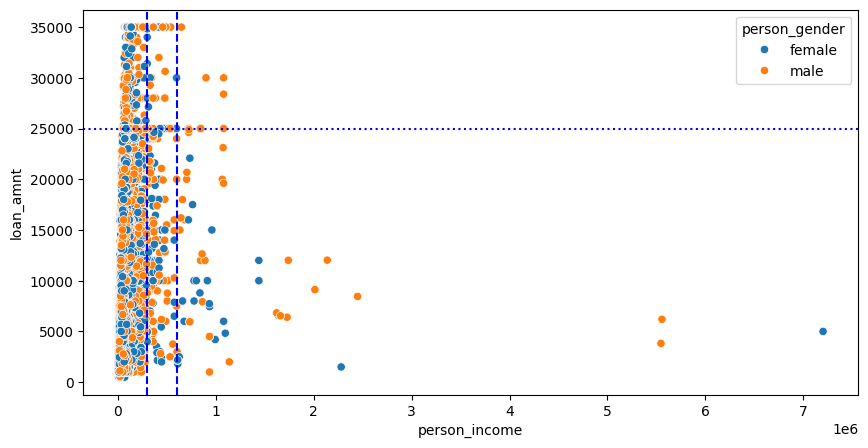

In [35]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = df['person_income'],y = df['loan_amnt'],hue =df['person_gender'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.axvline(600000,linestyle = '--',c = 'b')
plt.show()


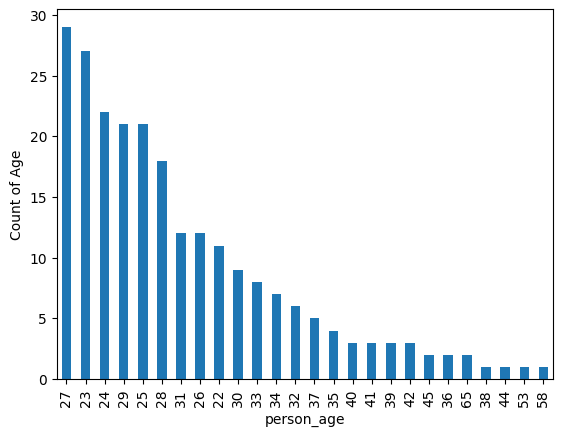

In [15]:
df[df['loan_amnt'] == 35000]['person_age'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Count of Age')
plt.show()

In [16]:
df['loan_amnt'].max()

35000

In [17]:
a = df[(df['loan_amnt'] == 35000) & (df['previous_loan_defaults_on_file'] == 'Yes')]

a['loan_status'].value_counts()

,count
loan_status,
0,101


In [18]:
101/234

0.43162393162393164

In [19]:
a = df[(df['loan_amnt'] == 35000) & (df['previous_loan_defaults_on_file'] == 'No')]

a['loan_status'].value_counts()

,count
loan_status,
1,73
0,60


In [20]:
a

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
6,26,female,Bachelor,93471,1,RENT,35000,EDUCATION,12.42,0.37,3,701,No,1
7,24,female,High School,95550,5,RENT,35000,MEDICAL,11.11,0.37,4,585,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44030,27,male,Associate,138803,5,MORTGAGE,35000,DEBTCONSOLIDATION,17.98,0.25,6,642,No,1
44130,27,female,Bachelor,116746,5,RENT,35000,VENTURE,17.49,0.30,4,675,No,1
44210,23,male,High School,129686,0,RENT,35000,DEBTCONSOLIDATION,16.48,0.27,4,672,No,1
44269,34,female,Doctorate,137667,12,MORTGAGE,35000,DEBTCONSOLIDATION,18.59,0.25,10,706,No,1


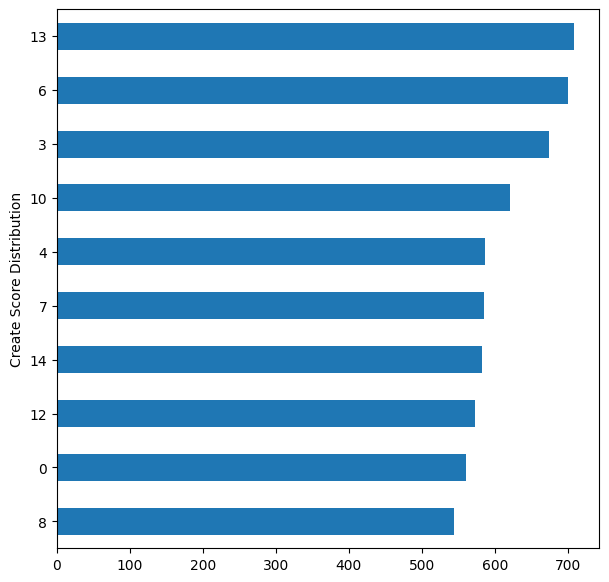

In [21]:
plt.figure(figsize = (7,7))
a['credit_score'].head(10).sort_values(ascending = True).plot(kind = 'barh')
plt.ylabel('Create Score Distribution')
plt.show()

In [22]:
a['credit_score'].max(),a['credit_score'].min()

(742, 470)

In [23]:
a[a['credit_score'] < 1000]['loan_status'].value_counts()

,count
loan_status,
1,73
0,60
